In [107]:
import pandas as pd
import numpy as np
source_path = '../data/raw/cryptocurrencypricehistory/'
csv_files = ['bitcoin_cash_price.csv',
             'bitcoin_price.csv',
             'bitconnect_price.csv',
             'dash_price.csv',
             'ethereum_classic_price.csv',
             'ethereum_price.csv',
             'iota_price.csv',
             'litecoin_price.csv',
             'monero_price.csv',
             'nem_price.csv',
             'neo_price.csv',
             'numeraire_price.csv',
             'omisego_price.csv',
             'qtum_price.csv',
             'ripple_price.csv',
             'stratis_price.csv',
             'waves_price.csv'
             ]

Select file do you like view setting file_index var.
Fit limit to viewed data if you want on nrows var.
Next run all notebook.

In [108]:
file_index = 0; # File 0 - 16 ok array of files
nrows = None # limit of rows to make preview (None for all data)

Loading data.
We need read Market Cap column as string because pandas can't manage NA converting to int.

In [109]:
csv_working_file = csv_files[16];
f = source_path + csv_working_file;
data = pd.read_csv(f,
            nrows=nrows,
            index_col=0,
            dtype={'Volume':'int','Market Cap':'string'},
            thousands=',',
            na_values='-',
            parse_dates=True)



Converting 'Market cap to Int64' to work with numeric types. If NA we set to 0.

In [110]:
data['Market Cap'] = data['Market Cap'].apply(lambda x :  int(x.replace(',','')) if isinstance(x, str) else 0 )

Plot of value of currencies.
We can view the High is always on top.
We can view the Low is always on bottom.

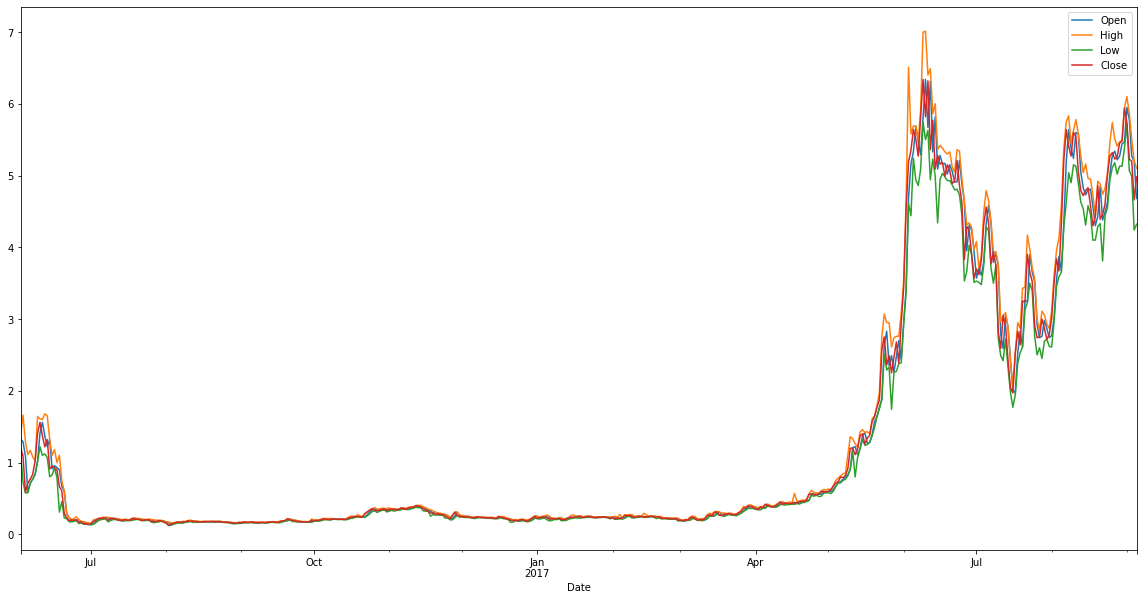

In [111]:
data.plot.line(y = ['Open','High','Low','Close'],  figsize=(20,10))

Plot of volume and capital.

The plot has concordancy with below plot that has high Market cap when are the high prices.

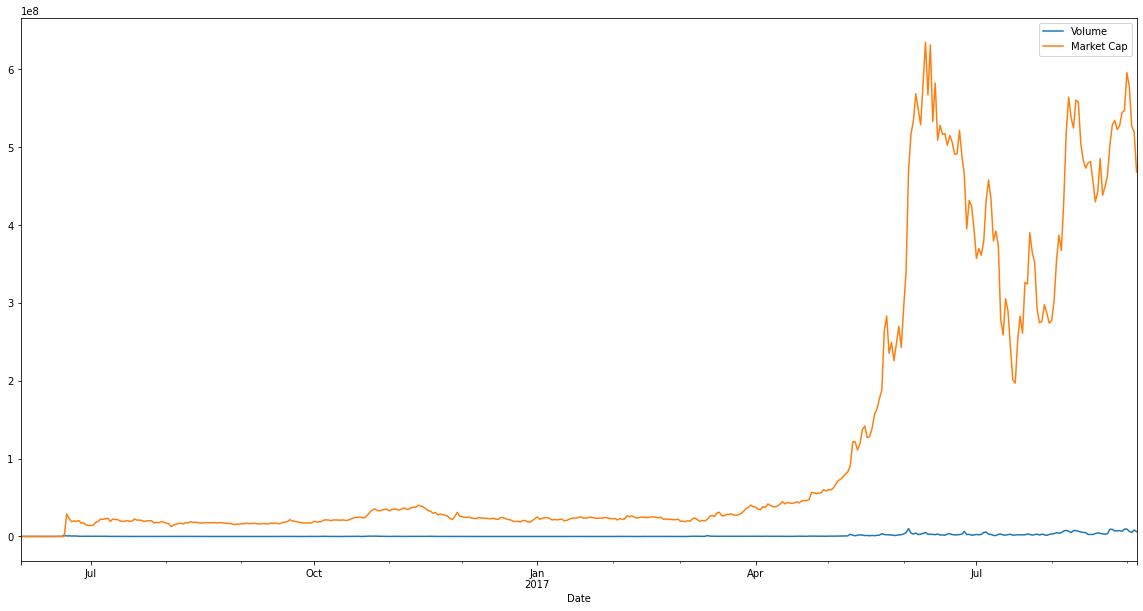

In [112]:
data.plot.line(y = ['Volume','Market Cap'],  figsize=(20,10))


